In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [2]:
sra_run = pd.read_csv('../SraRunInfo_719.csv')
sra_map = sra_run[['Run', 'SampleName']]


In [3]:
# reference-based transrate evaluation
file_dib_v_ncgr = "../assembly_evaluation_data/ncgr_combined_transrate_reference_all.csv"
file_ncgr_v_dib = "../assembly_evaluation_data/ncgr_combined_transrate_reverse_all.csv"

           

In [4]:
# Load in df and add the mmetsp/sra information
dib_v_ncgr = pd.read_csv(file_dib_v_ncgr,index_col="Run")
#dib_v_ncgr = pd.merge(sra_map, dib_v_ncgr, on='Run')

ncgr_v_dib = pd.read_csv(file_ncgr_v_dib,index_col="Run")
#ncgr_v_dib = pd.merge(sra_map, ncgr_v_dib, on='SampleName')

In [5]:
ncgr_v_dib.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
MMETSP0950,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,27471,150,14014,36172177,1304.78563,1907,15044,22,19072,...,0.22814,7345,0.19859,3737,0.10104,0.40892,NaN,NaN,NaN,MMETSP0950
MMETSP0593,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,17432,150,15424,20529477,1153.87316,2402,7650,1,10047,...,0.21553,4589,0.18336,2241,0.08954,0.33171,NaN,NaN,NaN,MMETSP0593
MMETSP0470,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,32594,150,12159,27907820,834.99037,3987,10612,3,17617,...,0.19256,9600,0.16090,5066,0.08491,0.31231,NaN,NaN,NaN,MMETSP0470
MMETSP1362,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,19105,150,17692,21081519,1078.58864,2749,8019,12,10202,...,0.23165,5429,0.20709,2940,0.11215,0.34667,NaN,NaN,NaN,MMETSP1362
MMETSP1315,/mnt/research/ged/lisa/mmetsp/imicrobe/nt/MMET...,15102,150,15328,13090771,833.97861,2881,4461,8,7046,...,0.23920,3801,0.19324,1739,0.08841,0.31663,NaN,NaN,NaN,MMETSP1315


In [6]:
dib_v_ncgr.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
MMETSP0950,/mnt/scratch/ljcohen/mmetsp/Chattonella_subsal...,36986,201,12660,31196014,843.45466,0,11070,8,17295,...,0.28572,7366,0.26814,6477,0.23578,0.31607,NaN,NaN,NaN,MMETSP0950
MMETSP0593,/mnt/scratch/ljcohen/mmetsp/Skeletonema_japoni...,25027,201,9656,24649577,984.91937,0,8856,0,13518,...,0.32957,5380,0.30863,4936,0.28316,0.43975,NaN,NaN,NaN,MMETSP0593
MMETSP0470,/mnt/scratch/ljcohen/mmetsp/Oxyrrhis_marina/SR...,59666,201,12200,38242107,640.93633,0,11205,4,23544,...,0.39998,12635,0.38765,12117,0.37176,0.45116,NaN,NaN,NaN,MMETSP0470
MMETSP1362,/mnt/scratch/ljcohen/mmetsp/Leptocylindrus_dan...,26216,201,11929,24816761,946.62653,0,8881,5,13107,...,0.32395,5862,0.30683,5383,0.28176,0.44161,NaN,NaN,NaN,MMETSP1362
MMETSP1315,/mnt/scratch/ljcohen/mmetsp/Prasinoderma_singu...,19670,201,10457,15631989,794.71220,0,5038,2,9802,...,0.33691,4743,0.31406,4262,0.28221,0.43319,NaN,NaN,NaN,MMETSP1315


In [7]:
#Set indexing value
#ncgr_v_dib = ncgr_v_dib.set_index('Run')
#dib_v_ncgr = dib_v_ncgr.set_index('Run')

#dib_busco = dib_busco.set_index('Run')
#ncgr_busco = ncgr_busco.set_index('Run')

#dib_transrate = dib_transrate.set_index('Run')
#ncgr_transrate = ncgr_transrate.set_index('Run')

dib_v_ncgr = dib_v_ncgr.drop_duplicates()
ncgr_v_dib = ncgr_v_dib.drop_duplicates()


### Plotting functions 


In [8]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax


## Checking out different variables reported by transrate

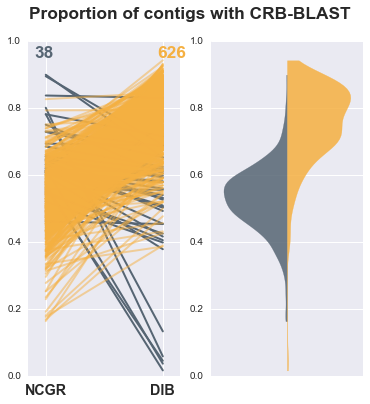

In [9]:
p_refs_with_CRBB, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

In [12]:
p_refs_with_CRBB.loc[p_refs_with_CRBB.DIB > p_refs_with_CRBB.NCGR]


,NCGR,DIB
Run,,
MMETSP0950,0.49067,0.67515
MMETSP0593,0.55724,0.78941
MMETSP0470,0.49018,0.89523
MMETSP1362,0.56519,0.76535
MMETSP1315,0.62501,0.80175
MMETSP0494,0.47675,0.82312
MMETSP0820,0.50338,0.77178
MMETSP1386,0.65549,0.87410
MMETSP0147,0.37446,0.85626


In [17]:
# Suspecting that dib assemblies have larger numbers of smaller contigs, 
# and ncgr assemblies have smaller numbers of larger contigs
# this looks at the # of total contigs assembled
# looking at 72 for which the ncgr (as reference) had higher p_refs_with_CRBB than dib (as reference)
SRR_id = "SRR1294417"
col = "n_seqs"
print(ncgr_v_dib.loc[SRR_id,col])
print(dib_v_ncgr.loc[SRR_id,col])
# looks like there is a discrepancy in the number of contigs assembled by ncgr (higher)

25309
7570


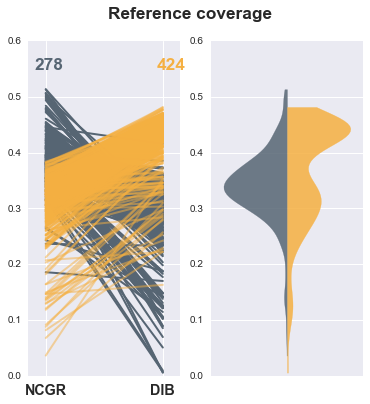

In [18]:
reference_coverage, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.6, ypos = 0.55)

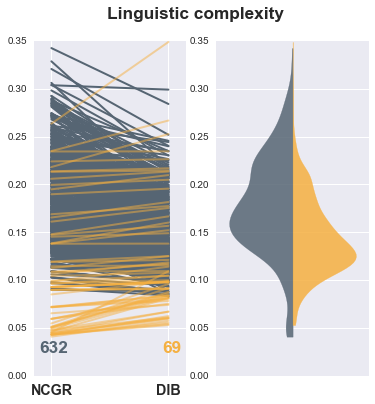

In [19]:
linguistic_complexity, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'linguistic_complexity', 'Linguistic complexity', ymax=0.35, ypos=0.025)

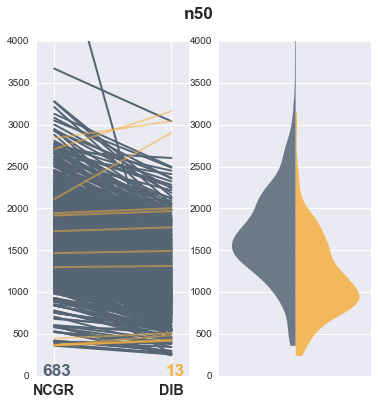

In [20]:
n50, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n50', 'n50', ymax=4000)

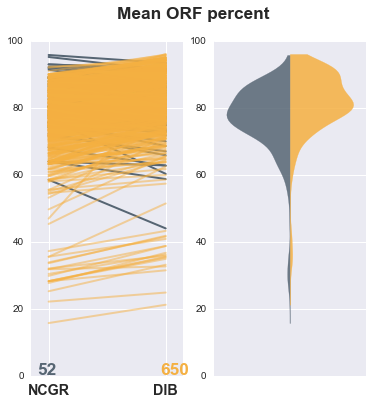

In [21]:
mean_orf_percent, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

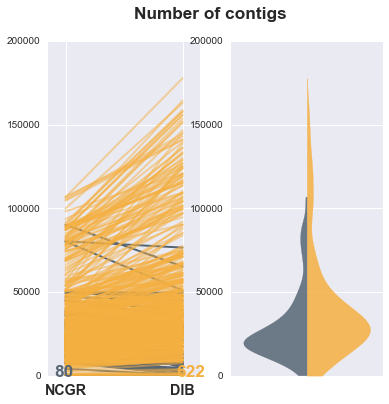

In [18]:
n_seqs, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n_seqs', 'Number of contigs',ymax=200000, ypos=0.5)

In [23]:
n_seqs.loc[n_seqs.DIB < 5000]

,NCGR,DIB
20,11489,2228
31,380,758
46,15238,2921
90,1220,2104
91,2883,3906
109,21354,1252
119,380,106
149,380,115
151,4234,341
161,8549,617


# Comparing BUSCO scores

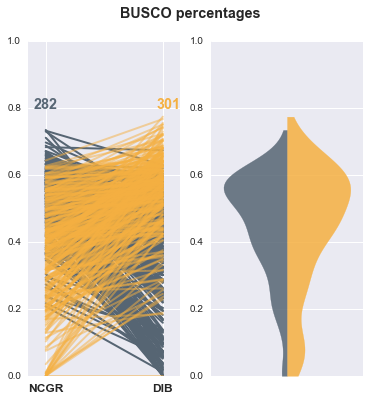

In [69]:
busco_scores, fig, ax = create_plots(ncgr_busco,dib_busco,'Complete_BUSCO_perc', 'BUSCO percentages',ymax=1.0, ypos=0.8)

In [70]:
busco_scores.loc[busco_scores.DIB < 0.1]

,NCGR,DIB
3,0.571096,0.065268
16,0.424242,0.002331
29,0.622378,0.060606
39,0.543124,0.072261
46,0.575758,0.000000
63,0.575758,0.069930
82,0.449883,0.074592
105,0.470862,0.000000
119,0.207459,0.011655
191,0.505828,0.034965


# Comparing Transrate scores

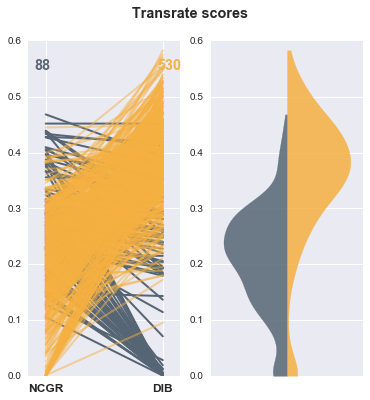

In [71]:
score,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'score', 'Transrate scores',ymax=.6, ypos=0.55)

In [72]:
score.loc[score.DIB < 0.1]


,NCGR,DIB
6,0.26841,0.00520
8,0.30504,0.00097
55,0.19151,0.00398
67,0.28257,0.00090
77,0.33421,0.00490
84,0.17865,0.00064
97,0.12744,0.02814
99,0.25200,0.00630
101,0.24802,0.00018
107,0.18939,0.01201
